In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.sparse
import pickle
import glob

from surprise import Dataset, Reader, SVD, BaselineOnly, accuracy
from surprise.model_selection import GridSearchCV
from metrics import Evaluator

from time import perf_counter
from tqdm.notebook import tqdm

In [2]:
mypath = "D:/0Studia/Data-Science-PW\Masters-thesis/data/"
savepath = "D:/0Studia/Data-Science-PW\Masters-thesis\models/mf/model_tuning/"

In [2]:
explicit = pd.read_csv(mypath+"explicit_train.csv")
validation = pd.read_csv(mypath+"leave_one_out_validation.csv")

In [3]:
# list with (user,item) tuples from validation set
validation_list = [(u,i) for u,i in zip(validation.user_name, validation.game_id)]
# dict with user:game key-value pairs from validation set
validation_dict = {u:i for u,i in zip(validation.user_name, validation.game_id)}

# unique series for users and games
users = explicit.user_name.unique()
games = explicit.game_id.unique()

In [4]:
# reading data from pandas dataframe
reader = Reader(rating_scale=(1,10))
data = Dataset.load_from_df(explicit, reader)

# using whole df as trainset
trainset = data.build_full_trainset()

In [22]:
# configurins learning options

lr_all = 0.05
params = {"lr_all":0.1, "n_epochs":5, "n_factors":20, "reg_all":0.1}


mf = SVD(**params)

start = perf_counter()
mf.fit(trainset)
print(f"One epoch took {perf_counter() - start} seconds.")

In [25]:
# investingating how long model should be trained
# (optimizing number of epochs and learning rate)

# number of factors
n_factors = [100]
# neighborhood size
#regs = [0.01, 0.02, 0.05]
lr_alls = [0.001, 0.007, 0.02, 0.05]
# top-10 recommendation list
k = 10 
# sample size 
sample_size = 200

params = {"lr_all":0.007, "n_epochs":5, "n_factors":20, "reg_all":0.02}

counter = 1
for n_fac in n_factors:
    for lr in lr_alls:
        print(f"Model number {counter} is being trained.")
        # set the parameters
        params["lr_all"] = lr
        params["n_factors"] = n_fac
        
        # train the model
        mf = SVD(**params)
        
        mf.fit(trainset)
        
        print("Computing top-k list for each user...")
        # produce top k list for all users
        top_k_list = produce_top_k(model=mf, users=users, games=games,
                                   validation_dict=validation_dict,
                                   k=k, sample_size=sample_size)
        
        
        print("...evaluation...")
        ev = Evaluator(k=k, true=validation_list, predicted=top_k_list)
        ev.calculate_metrics()
        ngcg10, err10, hr10 = ev.ndcg, ev.err, ev.hr
        
        # save the obtained results
        """
        res = {}
        res["n_factors"] = lambda_
        res["lr"] = neigh_size
        res["k"] = k
        res["ndcg10"] = ngcg10
        res["err10"] = err10
        res["hr10"] = hr10
        res["reg"] = reg
        res["all_params"] = sim_options
        res["bsl_options"] = bsl_options
        res["min_k_knn"] = min_k_knn
        """
        print(ngcg10, err10, hr10)
        # save the obtained results
        #with open(savepath+f"knn_{counter}", "wb") as handle:
        #    pickle.dump(res, handle, protocol=pickle.HIGHEST_PROTOCOL)
            
        counter += 1
        print("...and end.")

Model number 1 is being trained.
Computing top-k list for each user...


  0%|          | 0/109084 [00:00<?, ?it/s]

...evaluation...
0.36755158607885685 0.21304835361747831 0.8982119901834755
...and end.
Model number 2 is being trained.
Computing top-k list for each user...


  0%|          | 0/109084 [00:00<?, ?it/s]

...evaluation...
0.3552492550841837 0.20621137440106693 0.8702179875848131
...and end.
Model number 3 is being trained.
Computing top-k list for each user...


  0%|          | 0/109084 [00:00<?, ?it/s]

...evaluation...
0.3758023356443388 0.22622697480818815 0.8856816699282453
...and end.
Model number 4 is being trained.
Computing top-k list for each user...


  0%|          | 0/109084 [00:00<?, ?it/s]

...evaluation...
0.4140499564352735 0.26770627392614643 0.908723371170891
...and end.


In [26]:
# number of factors
n_factors = [100]
# neighborhood size
#regs = [0.01, 0.02, 0.05]
lr_alls = [0.001, 0.007, 0.02, 0.05]
# top-10 recommendation list
k = 10 
# sample size 
sample_size = 200

params = {"lr_all":0.007, "n_epochs":20, "n_factors":20, "reg_all":0.02}

counter = 1
for n_fac in n_factors:
    for lr in lr_alls:
        print(f"Model number {counter} is being trained.")
        # set the parameters
        params["lr_all"] = lr
        params["n_factors"] = n_fac
        
        # train the model
        mf = SVD(**params)
        
        mf.fit(trainset)
        
        print("Computing top-k list for each user...")
        # produce top k list for all users
        top_k_list = produce_top_k(model=mf, users=users, games=games,
                                   validation_dict=validation_dict,
                                   k=k, sample_size=sample_size)
        
        
        print("...evaluation...")
        ev = Evaluator(k=k, true=validation_list, predicted=top_k_list)
        ev.calculate_metrics()
        ngcg10, err10, hr10 = ev.ndcg, ev.err, ev.hr
        
        # save the obtained results
        """
        res = {}
        res["n_factors"] = lambda_
        res["lr"] = neigh_size
        res["k"] = k
        res["ndcg10"] = ngcg10
        res["err10"] = err10
        res["hr10"] = hr10
        res["reg"] = reg
        res["all_params"] = sim_options
        res["bsl_options"] = bsl_options
        res["min_k_knn"] = min_k_knn
        """
        print(ngcg10, err10, hr10)
        # save the obtained results
        #with open(savepath+f"knn_{counter}", "wb") as handle:
        #    pickle.dump(res, handle, protocol=pickle.HIGHEST_PROTOCOL)
            
        counter += 1
        print("...and end.")

Model number 1 is being trained.
Computing top-k list for each user...


  0%|          | 0/109084 [00:00<?, ?it/s]

...evaluation...
0.3717751866055743 0.21748690082023417 0.9013629013629013
...and end.
Model number 2 is being trained.
Computing top-k list for each user...


  0%|          | 0/109084 [00:00<?, ?it/s]

...evaluation...
0.38108713934247235 0.2302999459453243 0.8957664838008488
...and end.
Model number 3 is being trained.
Computing top-k list for each user...


  0%|          | 0/109084 [00:00<?, ?it/s]

...evaluation...
0.4057613472760704 0.2602138279682809 0.8994062765055132
...and end.
Model number 4 is being trained.
Computing top-k list for each user...


  0%|          | 0/109084 [00:00<?, ?it/s]

...evaluation...
0.4116252256800242 0.2657181480257999 0.9052974563800714
...and end.


## Results

In [3]:
n_files = len(glob.glob(savepath+"/*"))
res = []
for i in range(1,n_files+1):
    res.append(pd.read_pickle(savepath+f"/mf_{i}"))

In [4]:
res[0]

{'n_factors': 10,
 'reg': 0.005,
 'k': 10,
 'ndcg10': 0.07836267904411408,
 'err10': 0.05489397132717876,
 'hr10': 0.15667742290345055,
 'sample_size': 200,
 'all_params': {'lr_all': 0.05,
  'n_epochs': 20,
  'n_factors': 10,
  'reg_all': 0.005}}

In [5]:
resdf = pd.DataFrame(columns=["n_factors", "regularization", "metric_name", "metric_value"])
rows_list = []
for r in res:
    d1 = {}
    d1["n_factors"] = r["n_factors"]
    d1["regularization"] = r["reg"]
    d1["metric_name"] = "NDCG10"
    d1["metric_value"] = r["ndcg10"]
    rows_list.append(d1)
    
    d2 = {}
    d2["n_factors"] = r["n_factors"]
    d2["regularization"] = r["reg"]
    d2["metric_name"] = "ERR10"
    d2["metric_value"] = r["err10"]
    rows_list.append(d2)
    
    d3 = {}
    d3["n_factors"] = r["n_factors"]
    d3["regularization"] = r["reg"]
    d3["metric_name"] = "HR10"
    d3["metric_value"] = r["hr10"]
    rows_list.append(d3)

    
resdf = pd.DataFrame(rows_list)

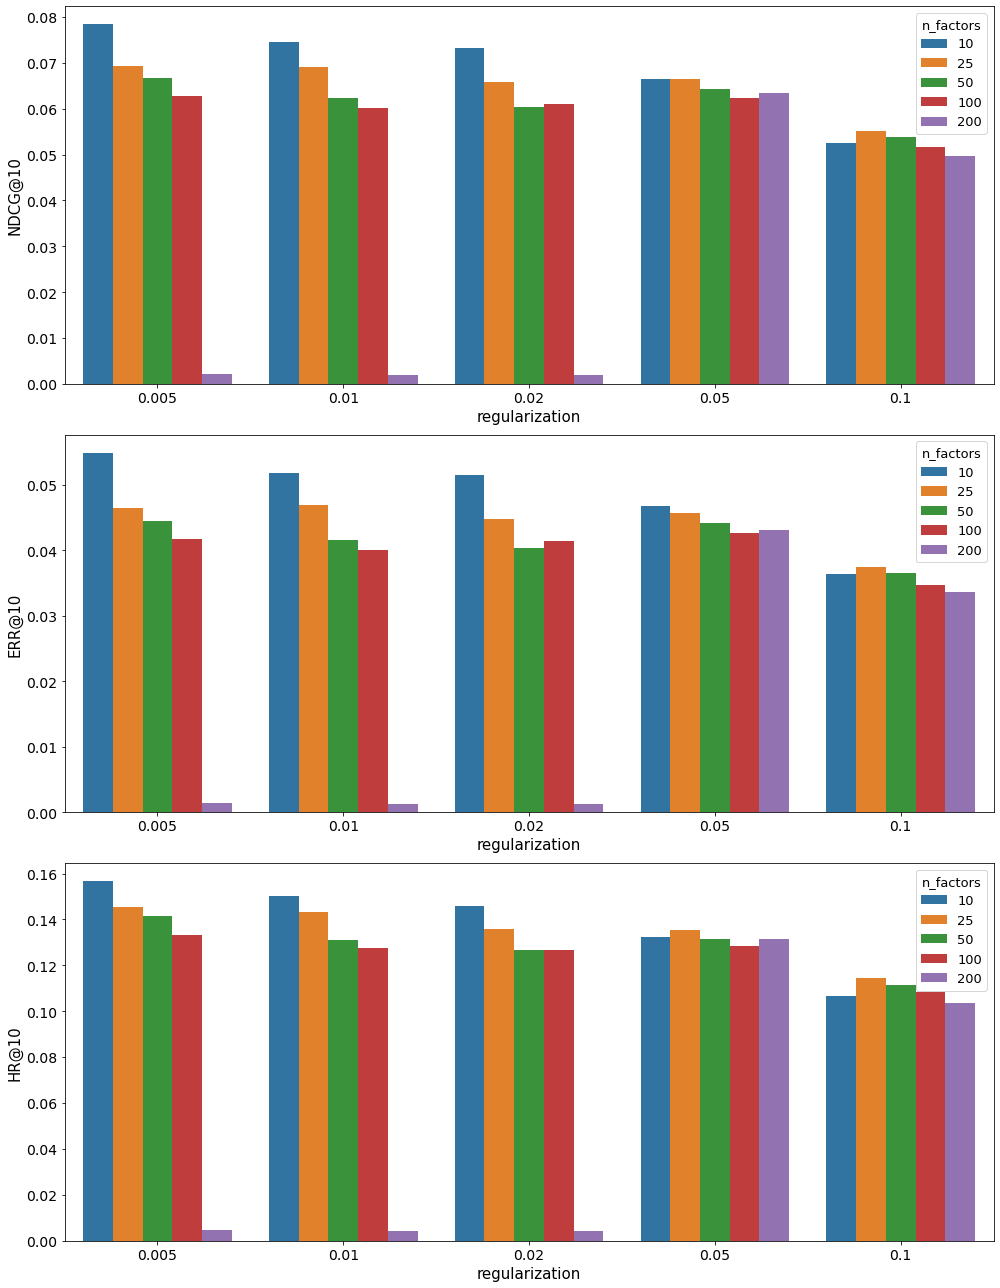

In [35]:
metrics = resdf.metric_name.unique()
fig, axes = plt.subplots(len(metrics), 1, figsize=(14,18))
# axes = axes.ravel()
for i in range(len(metrics)):
    tmp = resdf[resdf.metric_name==metrics[i]]
    #axes[i].set_title(f"Results for {metrics[i][:-2]}@{metrics[i][-2:]}", fontsize=17)
    sn.barplot(y="metric_value", x="regularization", hue="n_factors", data=tmp, ax=axes[i])
    axes[i].tick_params(axis="y", labelsize=14)
    axes[i].set_ylabel(f"{metrics[i][:-2]}@{metrics[i][-2:]}", fontsize=15)
    axes[i].tick_params(axis="x", labelsize=14)
    axes[i].set_xlabel("regularization", fontsize=15)
    axes[i].legend(title="n_factors", title_fontsize=13, fontsize=13, frameon=1, loc="upper right")
    
    
fig.tight_layout()
#fig.delaxes(axes[-1])

In [6]:
resdf[(resdf.n_factors==10) & (resdf.metric_name=="NDCG10")]

,n_factors,regularization,metric_name,metric_value
0,10,0.01,NDCG10,0.068323
3,10,0.02,NDCG10,0.070132
6,10,0.05,NDCG10,0.059377
9,10,0.10,NDCG10,0.043114
